# Procesos ETL
## Transformación

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
from extraccion import Extraccion as extra

In [48]:
extraccion = extra()

uri = "mongodb://localhost:27017/"
database = "bi_mx"
df_listings = extraccion.extraer_mongo_df(uri, database, "listings")
df_reviews = extraccion.extraer_mongo_df(uri, database, "reviews")
df_calendar = extraccion.extraer_mongo_df(uri, database, "calendar")

Conectando a la base de datos 'bi_mx'...
✅ Conexión exitosa a la base de datos 'bi_mx'.
Extrayendo datos de la colección 'listings'...
📦 Colección 'listings' extraída correctamente. Registros obtenidos: 26401
Conectando a la base de datos 'bi_mx'...
✅ Conexión exitosa a la base de datos 'bi_mx'.
Extrayendo datos de la colección 'reviews'...
📦 Colección 'reviews' extraída correctamente. Registros obtenidos: 1388226
Conectando a la base de datos 'bi_mx'...
✅ Conexión exitosa a la base de datos 'bi_mx'.
Extrayendo datos de la colección 'calendar'...
📦 Colección 'calendar' extraída correctamente. Registros obtenidos: 11244365


# Entendimiento general de los datos

<>:50: SyntaxWarning: invalid escape sequence '\$'
<>:50: SyntaxWarning: invalid escape sequence '\$'
C:\Users\DELL\AppData\Local\Temp\ipykernel_26664\2420675699.py:50: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)



Cantidad de filas duplicadas: 0
Primeras filas del dataset de listings:


,_id,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,68fbabb528e1b398f4227431,35797,https://www.airbnb.com/rooms/35797,20250625031918,2025-06-26,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68fbabb528e1b398f4227432,44616,https://www.airbnb.com/rooms/44616,20250625031918,2025-07-01,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,...,2011-11-09,2025-01-01,4.59,4.56,4.70,4.87,4.78,4.98,4.47,0.39
2,68fbabb528e1b398f4227433,56074,https://www.airbnb.com/rooms/56074,20250625031918,2025-07-01,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,...,2011-04-02,2025-02-27,4.87,4.95,4.88,4.98,4.94,4.76,4.79,0.48
3,68fbabb528e1b398f4227434,67703,https://www.airbnb.com/rooms/67703,20250625031918,2025-07-01,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,...,2011-11-17,2024-10-30,4.90,4.82,4.76,4.94,4.92,4.98,4.92,0.30
4,68fbabb528e1b398f4227435,70644,https://www.airbnb.com/rooms/70644,20250625031918,2025-07-01,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,...,2012-02-14,2024-12-28,4.92,4.91,4.96,4.96,4.98,4.96,4.92,0.81



Cantidad de registros: 26401
Cantidad de columnas: 77

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   _id                                           26401 non-null  object        
 1   id                                            26401 non-null  int64         
 2   listing_url                                   26401 non-null  object        
 3   scrape_id                                     26401 non-null  int64         
 4   last_scraped                                  26401 non-null  datetime64[ns]
 5   source                                        26401 non-null  object        
 6   name                                          26401 non-null  object        
 7   description                                   25633 non-nul

_id                               0
id                                0
listing_url                       0
scrape_id                         0
last_scraped                      0
                               ... 
review_scores_checkin          3375
review_scores_communication    3375
review_scores_location         3375
review_scores_value            3375
reviews_per_month              3373
Length: 77, dtype: int64


Porcentaje de valores nulos por columna:


_id                             0.00
id                              0.00
listing_url                     0.00
scrape_id                       0.00
last_scraped                    0.00
                               ...  
review_scores_checkin          12.78
review_scores_communication    12.78
review_scores_location         12.78
review_scores_value            12.78
reviews_per_month              12.78
Length: 77, dtype: float64


Cantidad de filas duplicadas: 0


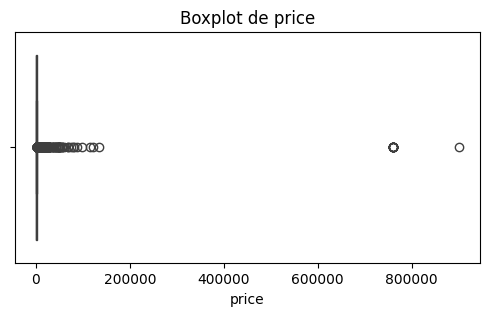

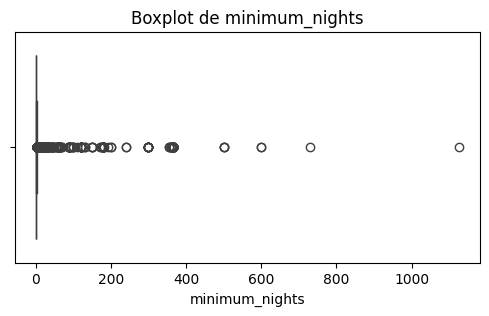

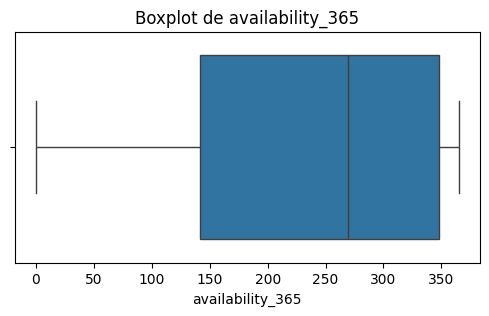


Ejemplo de conteo de amenities creados correctamente.

Rango de fechas de las últimas reseñas:
Desde: 2013-12-21 00:00:00  Hasta: 2025-07-01 00:00:00


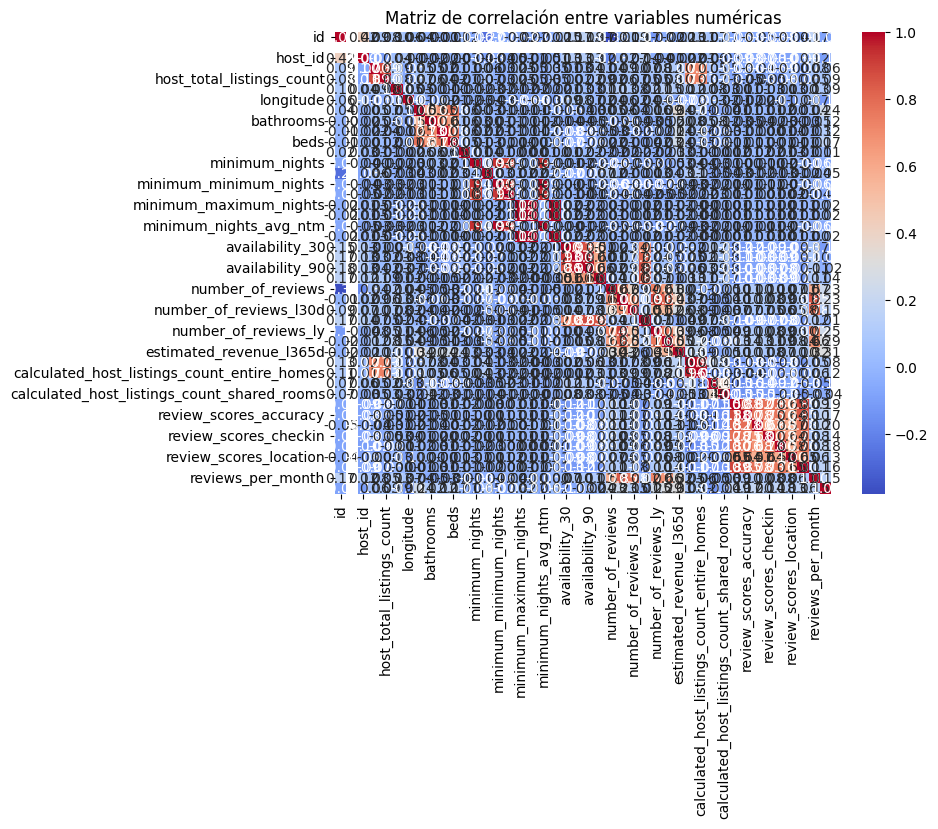


=== PRINCIPALES HALLAZGOS ===
- Rango de precios: 66.0 - 900000.0
- Se observaron valores atípicos en la variable 'price', posiblemente asociados a alojamientos de lujo.
- Existen anuncios con un número de noches mínimo inusualmente alto, lo cual podría distorsionar análisis de ocupación.
- Algunos alojamientos tienen disponibilidad completa (365 días) y otros 0, indicando diferentes estrategias de oferta.
- El campo 'amenities' fue desanidado, y se creó una nueva columna con el conteo de servicios.
- Se detectaron columnas con valores nulos que podrían requerir imputación o eliminación según su relevancia.
- Se estandarizaron formatos de texto y fechas.


In [49]:
# =====================================
# 2. ANÁLISIS EXPLORATORIO DE DATOS (EDA) - LISTINGS
# =====================================

# Cargar los datos de anuncios (listings)
listings = df_listings

# Convierte columnas con listas a string para evitar el error de duplicados
for col in listings.columns:
    if listings[col].apply(lambda x: isinstance(x, list)).any():
        listings[col] = listings[col].astype(str)

duplicates = listings.duplicated().sum()
print(f"\nCantidad de filas duplicadas: {duplicates}")

# Mostrar las primeras filas
print("Primeras filas del dataset de listings:")
display(listings.head())

# Cantidad de registros y columnas
print(f"\nCantidad de registros: {listings.shape[0]}")
print(f"Cantidad de columnas: {listings.shape[1]}")

# Tipos de datos
print("\nInformación general del dataset:")
listings.info()

# 2.2. CALIDAD DE DATOS
# ----------------------

# Valores nulos
print("\nValores nulos por columna:")
display(listings.isnull().sum())

# Porcentaje de valores nulos
print("\nPorcentaje de valores nulos por columna:")
display((listings.isnull().mean() * 100).round(2))

# Duplicados
duplicates = listings.duplicated().sum()
print(f"\nCantidad de filas duplicadas: {duplicates}")

if duplicates > 0:
    print("Se eliminarán registros duplicados.")
    listings = listings.drop_duplicates()

# Limpieza y conversión de precios (si existe la columna)
if 'price' in listings.columns:
    listings['price'] = (listings['price']
                         .replace('[\$,]', '', regex=True)
                         .astype(float))

# 2.3. DETECCIÓN DE VALORES ATÍPICOS
# -----------------------------------
numeric_cols = ['price', 'minimum_nights', 'availability_365']
for col in numeric_cols:
    if col in listings.columns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x=listings[col])
        plt.title(f'Boxplot de {col}')
        plt.show()

# 2.4. TRANSFORMACIONES POTENCIALES
# ----------------------------------

# Desanidar campos (por ejemplo amenities o host_verifications)
if 'amenities' in listings.columns:
    listings['amenities'] = listings['amenities'].astype(str)
    listings['n_amenities'] = listings['amenities'].apply(lambda x: len(x.split(',')))
    print("\nEjemplo de conteo de amenities creados correctamente.")

# Estandarizar formatos de texto
text_cols = ['name', 'neighbourhood', 'room_type']
for col in text_cols:
    if col in listings.columns:
        listings[col] = listings[col].astype(str).str.lower().str.strip()

# Estandarizar fechas si existen
if 'last_review' in listings.columns:
    listings['last_review'] = pd.to_datetime(listings['last_review'], errors='coerce')
    print("\nRango de fechas de las últimas reseñas:")
    print(f"Desde: {listings['last_review'].min()}  Hasta: {listings['last_review'].max()}")

# Análisis de correlación entre variables numéricas
plt.figure(figsize=(8,6))
sns.heatmap(listings.select_dtypes('number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

# 2.5. DOCUMENTACIÓN DE HALLAZGOS
# --------------------------------
print("\n=== PRINCIPALES HALLAZGOS ===")

# Ejemplo de hallazgos interpretativos (ajustar según tus resultados reales)
if 'price' in listings.columns:
    print(f"- Rango de precios: {listings['price'].min()} - {listings['price'].max()}")
    print("- Se observaron valores atípicos en la variable 'price', posiblemente asociados a alojamientos de lujo.")
if 'minimum_nights' in listings.columns:
    print("- Existen anuncios con un número de noches mínimo inusualmente alto, lo cual podría distorsionar análisis de ocupación.")
if 'availability_365' in listings.columns:
    print("- Algunos alojamientos tienen disponibilidad completa (365 días) y otros 0, indicando diferentes estrategias de oferta.")
if 'amenities' in listings.columns:
    print("- El campo 'amenities' fue desanidado, y se creó una nueva columna con el conteo de servicios.")
if duplicates > 0:
    print("- Se eliminaron registros duplicados.")
if listings.isnull().sum().any():
    print("- Se detectaron columnas con valores nulos que podrían requerir imputación o eliminación según su relevancia.")
print("- Se estandarizaron formatos de texto y fechas.")


Primeras filas del dataset de reviews:


,_id,listing_id,id,date,reviewer_id,reviewer_name,comments
0,68fbaca828e1b398f422db54,10257549,59265221,2016-01-08,31043833,Karolis,The flat is very nice newly renovated. The hos...
1,68fbaca828e1b398f422db55,10257549,59352234,2016-01-09,7248934,James,Benito and his wife were great guests. Perfect...
2,68fbaca828e1b398f422db56,10257549,59456981,2016-01-10,52707457,Manuel,Fue algo express. No pude volar y contacté con...
3,68fbaca828e1b398f422db57,10257549,59661086,2016-01-13,52989229,Annie,This was a very comfortable and conveniently l...
4,68fbaca828e1b398f422db58,10257549,59806795,2016-01-15,51159033,Svenja,"Nice place, really close to te airport - Nice ..."



Cantidad de registros: 1388226
Cantidad de columnas: 7

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388226 entries, 0 to 1388225
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   _id            1388226 non-null  object        
 1   listing_id     1388226 non-null  int64         
 2   id             1388226 non-null  int64         
 3   date           1388226 non-null  datetime64[ns]
 4   reviewer_id    1388226 non-null  int64         
 5   reviewer_name  1388218 non-null  object        
 6   comments       1388226 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 74.1+ MB

Valores nulos por columna:


_id              0
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    8
comments         0
dtype: int64


Porcentaje de valores nulos por columna:


_id              0.0
listing_id       0.0
id               0.0
date             0.0
reviewer_id      0.0
reviewer_name    0.0
comments         0.0
dtype: float64


Cantidad de filas duplicadas: 0

Rango de fechas en el dataset:
Desde: 2011-04-02 00:00:00  Hasta: 2025-07-01 00:00:00


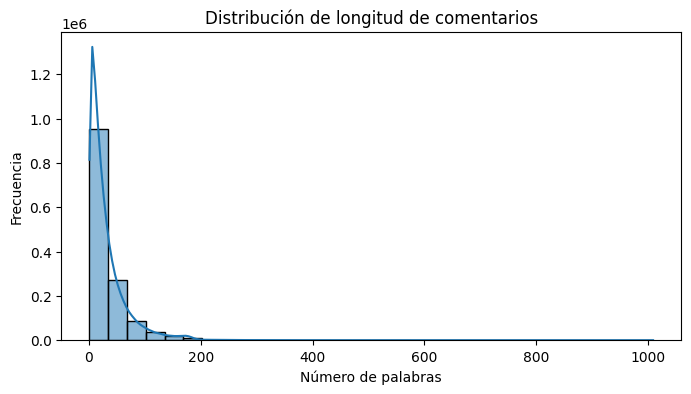

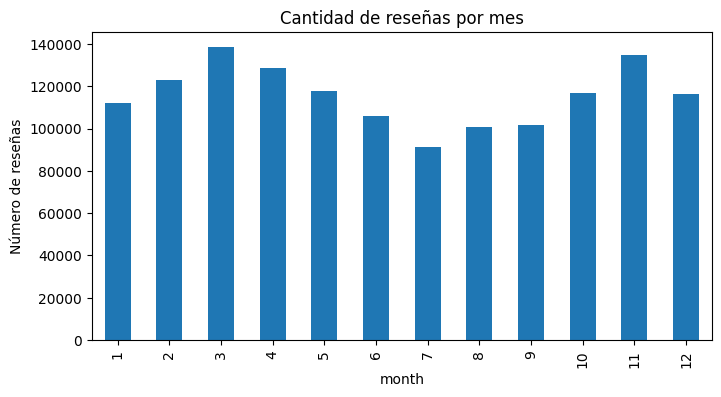


=== PRINCIPALES HALLAZGOS ===
- Se detectaron comentarios con diferentes longitudes; algunos muy extensos podrían contener información relevante adicional.
- Existen columnas con valores nulos que podrían requerir limpieza o imputación.
- Se estandarizó el formato de fecha y se determinó el rango temporal de las reseñas.
- No se identificaron campos anidados en este dataset.
- La distribución de la cantidad de palabras por comentario muestra variabilidad entre los usuarios.


In [50]:
# =====================================
# 2. ANÁLISIS EXPLORATORIO DE DATOS (EDA) - REVIEWS
# =====================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1. ENTENDIMIENTO GENERAL DE LOS DATOS
# ----------------------------------------

# Cargar los datos de reseñas de Airbnb
reviews = df_reviews

# Mostrar las primeras filas
print("Primeras filas del dataset de reviews:")
display(reviews.head())

# Cantidad de registros y columnas
print(f"\nCantidad de registros: {reviews.shape[0]}")
print(f"Cantidad de columnas: {reviews.shape[1]}")

# Tipos de datos y valores nulos
print("\nInformación general del dataset:")
reviews.info()

# 2.2. CALIDAD DE DATOS
# ----------------------

# Análisis de valores nulos
print("\nValores nulos por columna:")
display(reviews.isnull().sum())

# Porcentaje de valores nulos
print("\nPorcentaje de valores nulos por columna:")
display((reviews.isnull().mean() * 100).round(2))

# Duplicados
duplicates = reviews.duplicated().sum()
print(f"\nCantidad de filas duplicadas: {duplicates}")
if duplicates > 0:
    print("Se eliminarán registros duplicados.")
    reviews = reviews.drop_duplicates()

# 2.3. TRANSFORMACIONES POTENCIALES
# ----------------------------------

# Estandarizar fechas si existe una columna de fecha
if 'date' in reviews.columns:
    reviews['date'] = pd.to_datetime(reviews['date'], errors='coerce')
    print("\nRango de fechas en el dataset:")
    print(f"Desde: {reviews['date'].min()}  Hasta: {reviews['date'].max()}")

# Estandarización de texto: convertir comentarios a minúsculas
if 'comments' in reviews.columns:
    reviews['comments'] = reviews['comments'].astype(str).str.lower()

# Ejemplo: contar palabras por comentario para analizar la longitud del texto
if 'comments' in reviews.columns:
    reviews['comment_length'] = reviews['comments'].apply(lambda x: len(x.split()))
    plt.figure(figsize=(8,4))
    sns.histplot(reviews['comment_length'], bins=30, kde=True)
    plt.title('Distribución de longitud de comentarios')
    plt.xlabel('Número de palabras')
    plt.ylabel('Frecuencia')
    plt.show()

# Ejemplo: número de reseñas por mes (si hay fecha)
if 'date' in reviews.columns:
    reviews['month'] = reviews['date'].dt.month
    reviews_per_month = reviews.groupby('month')['id'].count()
    plt.figure(figsize=(8,4))
    reviews_per_month.plot(kind='bar', title='Cantidad de reseñas por mes')
    plt.ylabel('Número de reseñas')
    plt.show()

# 2.4. DOCUMENTACIÓN DE HALLAZGOS
# --------------------------------
print("\n=== PRINCIPALES HALLAZGOS ===")

# Hallazgos interpretativos según los resultados del análisis
if 'comments' in reviews.columns:
    print("- Se detectaron comentarios con diferentes longitudes; algunos muy extensos podrían contener información relevante adicional.")
if reviews.isnull().sum().any():
    print("- Existen columnas con valores nulos que podrían requerir limpieza o imputación.")
if duplicates > 0:
    print("- Se eliminaron registros duplicados.")
if 'date' in reviews.columns:
    print("- Se estandarizó el formato de fecha y se determinó el rango temporal de las reseñas.")
print("- No se identificaron campos anidados en este dataset.")
print("- La distribución de la cantidad de palabras por comentario muestra variabilidad entre los usuarios.")


Primeras filas del dataset:


<>:42: SyntaxWarning: invalid escape sequence '\$'
<>:42: SyntaxWarning: invalid escape sequence '\$'
C:\Users\DELL\AppData\Local\Temp\ipykernel_26664\2475565996.py:42: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


,_id,listing_id,date,available,minimum_nights,maximum_nights
0,68fbb46228e1b398f4380a19,35797,2025-06-26,False,1,7
1,68fbb46228e1b398f4380a1a,35797,2025-06-27,True,1,7
2,68fbb46228e1b398f4380a1b,35797,2025-06-28,True,1,7
3,68fbb46228e1b398f4380a1c,35797,2025-06-29,True,1,7
4,68fbb46228e1b398f4380a1d,35797,2025-06-30,True,1,7



Cantidad de registros: 11244365
Cantidad de columnas: 6

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11244365 entries, 0 to 11244364
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   _id             object        
 1   listing_id      int64         
 2   date            datetime64[ns]
 3   available       bool          
 4   minimum_nights  int64         
 5   maximum_nights  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(1)
memory usage: 439.7+ MB

Valores nulos por columna:


_id               0
listing_id        0
date              0
available         0
minimum_nights    0
maximum_nights    0
dtype: int64


Porcentaje de valores nulos por columna:


_id               0.0
listing_id        0.0
date              0.0
available         0.0
minimum_nights    0.0
maximum_nights    0.0
dtype: float64


Cantidad de filas duplicadas: 0


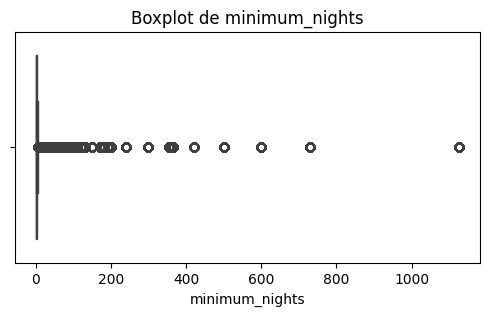


Rango de fechas en el dataset:
Desde: 2025-06-25 00:00:00  Hasta: 2026-07-01 00:00:00

=== PRINCIPALES HALLAZGOS ===
- Algunos registros muestran valores muy altos en 'minimum_nights', posibles errores de carga.
- Se estandarizaron los formatos de fecha y texto.
- No se detectaron campos desanidados en este dataset.


In [51]:
# ----------------------------------------
# 2.1. ENTENDIMIENTO GENERAL DE LOS DATOS
# ----------------------------------------

# Cargar los datos del calendario de Airbnb
calendar = df_calendar

# Mostrar las primeras filas
print("Primeras filas del dataset:")
display(df_calendar.head())

# Cantidad de registros y columnas
print(f"\nCantidad de registros: {df_calendar.shape[0]}")
print(f"Cantidad de columnas: {df_calendar.shape[1]}")

# Tipos de datos y valores nulos
print("\nInformación general del dataset:")
df_calendar.info()

# 2.2. CALIDAD DE DATOS
# ----------------------

# Análisis de valores nulos
print("\nValores nulos por columna:")
display(df_calendar.isnull().sum())

# Porcentaje de nulos para evaluar su impacto
print("\nPorcentaje de valores nulos por columna:")
display((df_calendar.isnull().mean() * 100).round(2))

# Duplicados
duplicates = df_calendar.duplicated().sum()
print(f"\nCantidad de filas duplicadas: {duplicates}")
if duplicates > 0:
    print("Se recomienda eliminar los duplicados.")
    df_calendar = df_calendar.drop_duplicates()

# Convertir columnas relevantes a tipo numérico (si aplica)
# Ejemplo: price puede venir como string con símbolos
if 'price' in df_calendar.columns:
    df_calendar['price'] = (df_calendar['price']
                         .replace('[\$,]', '', regex=True)
                         .astype(float))

# Detección de valores atípicos en campos numéricos
numericas = ['price', 'minimum_nights', 'availability_365']
for col in numericas:
    if col in df_calendar.columns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x=df_calendar[col])
        plt.title(f'Boxplot de {col}')
        plt.show()

# 2.3. TRANSFORMACIONES POTENCIALES
# ----------------------------------

# Desanidar campos: no aplica si el dataset no contiene listas o JSON
# Pero si existiera una columna tipo 'amenities' o 'host' se analizaría así:
# df_calendar['amenities'] = df_calendar['amenities'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

# Estandarización de formatos de fecha
if 'date' in df_calendar.columns:
    df_calendar['date'] = pd.to_datetime(df_calendar['date'], errors='coerce')

# Verificar rango de fechas
if 'date' in df_calendar.columns:
    print("\nRango de fechas en el dataset:")
    print(f"Desde: {df_calendar['date'].min()}  Hasta: {df_calendar['date'].max()}")

# Estandarización de texto (por ejemplo, columnas de disponibilidad)
if 'available' in df_calendar.columns:
    df_calendar['available'] = df_calendar['available'].astype(str).str.lower()

# Ejemplo de agrupación: promedio de precio por mes (si existe fecha y precio)
if {'date', 'price'}.issubset(df_calendar.columns):
    df_calendar['month'] = df_calendar['date'].dt.month
    price_by_month = df_calendar.groupby('month')['price'].mean()
    plt.figure(figsize=(8,4))
    price_by_month.plot(kind='bar', title='Precio promedio por mes')
    plt.ylabel('Precio promedio')
    plt.show()

# 2.4. DOCUMENTACIÓN DE HALLAZGOS
# --------------------------------
print("\n=== PRINCIPALES HALLAZGOS ===")

# Ejemplo de hallazgos interpretativos (ajusta según tus resultados):
if 'price' in df_calendar.columns:
    print(f"- Rango de precios: {df_calendar['price'].min()} - {df_calendar['price'].max()}")
    print("- Se identificaron posibles valores atípicos en la columna 'price'.")
if 'minimum_nights' in df_calendar.columns:
    print("- Algunos registros muestran valores muy altos en 'minimum_nights', posibles errores de carga.")
if 'availability_365' in df_calendar.columns:
    print("- Distribución variable en 'availability_365'; algunos alojamientos siempre disponibles, otros nunca.")
if duplicates > 0:
    print("- Se eliminaron registros duplicados.")
print("- Se estandarizaron los formatos de fecha y texto.")
print("- No se detectaron campos desanidados en este dataset.")
